> # SIMPLE LINEAR REGREESION - 1 

## Import the libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'Salary_data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory Data Analysis
* Shape
* dtypes
* Null values
* Boxplot
* Visualization

In [4]:
data.shape

(30, 2)

In [5]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
data.columns[data.isnull().any()]

Index([], dtype='object')

<AxesSubplot:>

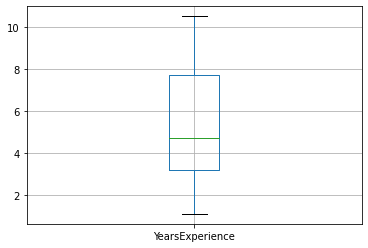

In [7]:
data.boxplot(['YearsExperience'])

Text(0, 0.5, 'Salary')

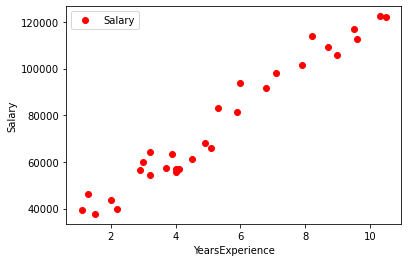

In [8]:
data.plot(x='YearsExperience', y='Salary', style='o',color = 'r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
# a linear relationship can be observed

## Store the value of the feature and the predicting column in seperate arrays

In [9]:
x = data.iloc[:,:1].values
y = data.iloc[:,-1].values

In [10]:
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## Split into training and testing set

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21, 1)
(21,)
(9, 1)
(9,)


In [13]:
x_train

array([[ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

## Fit the training data into the regression model

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

## Find coefficient and intercept

In [15]:
print(reg.coef_)
print(reg.intercept_)

[9360.26128619]
26777.391341197632


In [16]:
print('Y =',reg.coef_,'* X +',reg.intercept_)

Y = [9360.26128619] * X + 26777.391341197632


> y = a + bx\
> a - intercept or constant\
> b - regression coeff or slope

## Predict the values

In [17]:
y_pred = reg.predict(x_test)

In [18]:
y_test[:5],y_pred[:5]

(array([ 37731., 122391.,  57081.,  63218., 116969.]),
 array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
        115699.87356004]))

## Find Errors

In [19]:
from sklearn import metrics
import math
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :  3737.4178618788987
MSE :  23370078.800832972
RMSE :  4834.260936361728


In [20]:
Y = reg.intercept_ + reg.coef_*x

## Plot the LOBF

Text(0, 0.5, 'Salary')

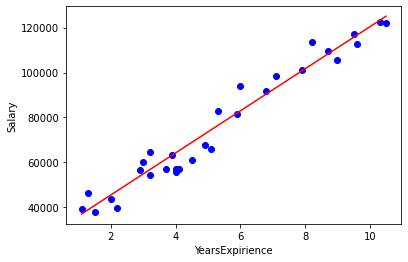

In [21]:
plt.scatter(x,y,color='b')
plt.plot(x, Y, color='r')
plt.xlabel("YearsExpirience")
plt.ylabel("Salary")

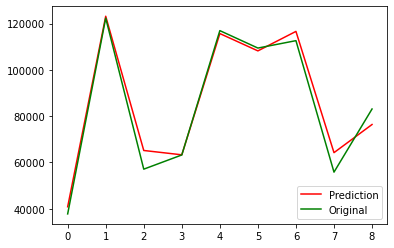

In [22]:
plt.plot(y_pred,c='r',label='Prediction')
plt.plot(y_test,c='g',label='Original')
plt.legend()
plt.show()

> # SIMPLE LINEAR REGRESSION - 2

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv(r'advertising.csv')

In [28]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [29]:
data.shape

(200, 4)

In [30]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [31]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [32]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<AxesSubplot:>

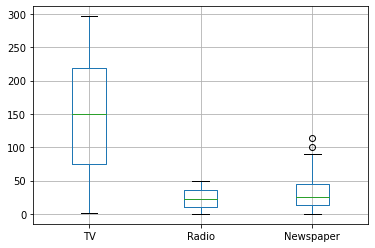

In [33]:
data.boxplot(column=['TV', 'Radio', 'Newspaper'])

<AxesSubplot:>

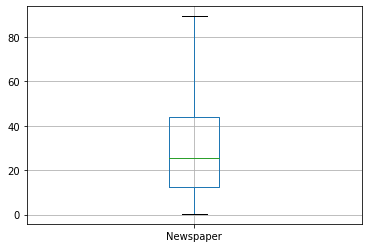

In [34]:
q1,q3 = np.percentile(data['Newspaper'],[25,75])
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
data = data[(data['Newspaper']>lower) & (data['Newspaper']<upper)]
data.boxplot('Newspaper')

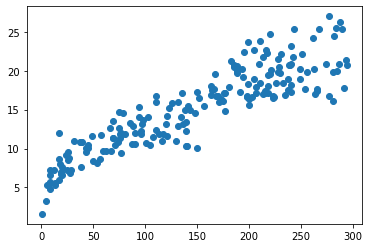

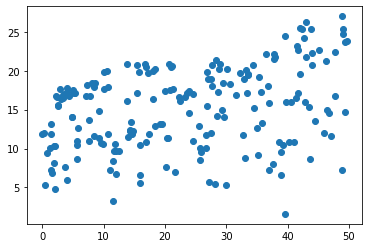

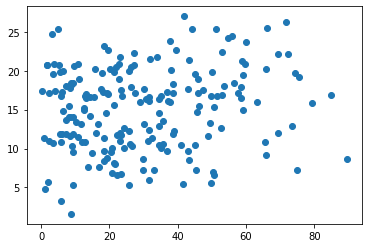

In [35]:
plt.scatter(data.TV,data.Sales)
plt.show()
plt.scatter(data.Radio,data.Sales)
plt.show()
plt.scatter(data.Newspaper,data.Sales)
plt.show()

In [36]:
x = data['TV']
y = data['Sales']

In [37]:
shuffle_data = data.sample(frac=1)
train_size = int(0.7*len(data))
train_set = shuffle_data[:train_size]
test_set = shuffle_data[train_size:]

In [38]:
x_train = train_set['TV']
y_train = train_set['Sales']
x_test = test_set['TV']
y_test = test_set['Sales']

In [39]:
def func(x,y):
    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    b1 = ((n*((x*y).sum())) - (x.sum()*y.sum())) / ((n*((x**2).sum())) - ((x.sum())**2))
    b0 = y_mean - (b1*x_mean)
    return(b0,b1)

In [40]:
b0, b1 = func(x_train,y_train)
print ("Intercept(b0) : ",b0)
print ("Slope(b1)     : ",b1)

Intercept(b0) :  7.07071926173256
Slope(b1)     :  0.05439640005587526


In [41]:
print('Y =',b0,'+',b1,'* X')

Y = 7.07071926173256 + 0.05439640005587526 * X


In [42]:
def pred(x,b0,b1):
    return (b0 + b1*x)

y_pred = pred(x_test,b0,b1)

In [43]:
def MAE(y_test,y_pred):    
    MAE = ((y_test - y_pred).abs().sum())/len(y_test)
    return MAE

def MSE(y_test,y_pred):    
    MSE = (((y_test - y_pred)**2).sum())/len(y_test)
    return MSE

def RMSE(y_test,y_pred):    
    RMSE = ((((y_test - y_pred)**2).sum())/len(y_test))**0.5
    return RMSE

MAE(y_test,y_pred), MSE(y_test,y_pred), RMSE(y_test,y_pred)

(1.7448687158759852, 4.87670455768227, 2.2083261891492096)

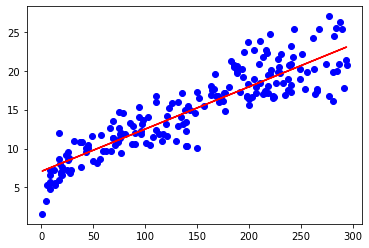

In [44]:
Y = b0 + b1*x
plt.scatter(x,y,color='b')
plt.plot(x, Y, color='r')